In [ ]:
import sys
import os
import string
import numpy as np
import tweepy as tw
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random
from tqdm import tqdm
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from textblob import TextBlob
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import sklearn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")


In [ ]:
consumer_key="CjSc45r1DiXJ3niB49Wug4Ic2"
consumer_secret="RQie4nM3X8Q6TnvTSqfeJnXlfVMZofBc2dymOysUAP4JSRoQQS"
access_token="1484045189698457601-OohOjOCQAw7w7kLmF8Qunc2fLIut80"
access_token_secret="upXzCxk3hCrvvG55AoOp0A9qSJ62E64VBcOVaqvksX7w"
#bearer_token="AAAAAAAAAAAAAAAAAAAAAGRDYQEAAAAA%2FLuBzbMeSitz5UcP0BArYeKIIck%3DbdmlNUZ358Yhvj09gxpLi0KHlFzyozDn9aT2mtp0lmKFOsk9W1"
auth = tw.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
#pip install tensorflow

In [ ]:
search_query = "#tourism -filter:retweets"

In [ ]:
tweets_df=pd.read_csv("tweets.csv")
tweets_df

,Unnamed: 0,user_name,user_location,user_description,user_verified,date,tweet,like,hashtags,source,is_retweet
0,0,Tour Nature Culture & Beauty,NaN,"Travelling, Culture, Nature, Beauty",False,2022-02-11 09:09:28+00:00,Beautiful view of centuries old market of #Nag...,0,"['Nagarparkar', 'Tharparkar', 'Sindh', 'touris...",Twitter Web App,False
1,1,West Bengal Tourism,Kolkata,Official Twitter Account of Tourism Department...,True,2022-02-11 09:07:01+00:00,"The land of natural beauty, Purulia welcomes y...",495,"['Purulia', 'Beauty', 'Bengal', 'BengalTourism...",Twitter Web App,False
2,2,Renfe-SNCF,NaN,We invite you to discover the new High Speed R...,False,2022-02-11 09:07:00+00:00,"🔝🚅 #NEXTSTOP 🚅🔝\nBuilt in the 18th century, th...",1626,"['NEXTSTOP', 'SantFerran', 'Catalonia', 'Spain...",Twitter Web App,False
3,3,VisitBritain Biz,London,VisitBritain is Britain's national tourism age...,False,2022-02-11 09:05:51+00:00,Our chair Dame Judith Macgregor (r) with @trad...,3218,"['APMEA', 'UKPavillion', 'UKNationalDay', 'tou...",Twitter Web App,False
4,4,Carmel Tourism,"Ibadan, Nigeria",Explore Africa Tourism\nTour Guide 👣| Travel A...,False,2022-02-11 09:03:27+00:00,"It's Friday guys, do well to follow our page @...",102,"['carmeltourism', 'Tourism', 'ValentinesDay', ...",Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...
4942,4942,CICA Secretariat,"Nur-Sultan, Kazakhstan",Secretariat of the Conference on Interaction a...,False,2022-02-04 03:45:08+00:00,Sincere congratulations to #SriLanka on the oc...,382,"['SriLanka', 'IndependenceDay', 'CICA', 'touri...",Twitter for Android,False
4943,4943,La Esperanza Travels,"Gurgaon, India","La Esperanza Travels, A Leading Travel Agent a...",False,2022-02-04 03:40:45+00:00,Bali To Reopen For International Tourists Star...,1,"['Bali', 'Covid19', 'Indonesia', 'Internationa...",Twitter Web App,False
4944,4944,SCMP Economy,Hong Kong,News and analysis on the big economic stories ...,True,2022-02-04 03:30:05+00:00,China’s once US$1.5 trillion tourism industry ...,73,"['China', 'china', 'tourism', 'tourist', 'trav...",Buffer,False
4945,4945,RiDetroit,"Detroit, MI",Detroit’s ONLY all eBike tour company. We offe...,False,2022-02-04 03:19:30+00:00,Coming Spring 2022! #ridetroit #ebike #tour #...,15,"['ridetroit', 'ebike', 'tour', 'tourism', 'Bla...",Twitter for iPhone,False


In [ ]:
tweets_df.tail(8)

,Unnamed: 0,user_name,user_location,user_description,user_verified,date,tweet,like,hashtags,source,is_retweet
4939,4939,Adventure Delight,"Shalimar Bagh, New Delhi",Adventure Delight is a travel company based in...,False,2022-02-04 03:49:56+00:00,Chanshal Pass Dodra Kwar (7 Days)\nBest tour ...,201,"['ChanshalPass', 'ChanshalPasstour', 'dodra', ...",Twitter Web App,False
4940,4940,stubbornnews,NaN,NaN,False,2022-02-04 03:49:29+00:00,@nWo_machine @fuujiiyade_0403 @Ladodgers_37 @L...,26,"['Bryggen', 'Hanseatic', 'Wharf', 'Bergen', 'N...",Twitter Web App,False
4941,4941,stubbornnews,NaN,NaN,False,2022-02-04 03:49:04+00:00,"@rogeliomtz75 #Bryggen #Hanseatic #Wharf, #Ber...",26,"['Bryggen', 'Hanseatic', 'Wharf', 'Bergen', 'N...",Twitter Web App,False
4942,4942,CICA Secretariat,"Nur-Sultan, Kazakhstan",Secretariat of the Conference on Interaction a...,False,2022-02-04 03:45:08+00:00,Sincere congratulations to #SriLanka on the oc...,382,"['SriLanka', 'IndependenceDay', 'CICA', 'touri...",Twitter for Android,False
4943,4943,La Esperanza Travels,"Gurgaon, India","La Esperanza Travels, A Leading Travel Agent a...",False,2022-02-04 03:40:45+00:00,Bali To Reopen For International Tourists Star...,1,"['Bali', 'Covid19', 'Indonesia', 'Internationa...",Twitter Web App,False
4944,4944,SCMP Economy,Hong Kong,News and analysis on the big economic stories ...,True,2022-02-04 03:30:05+00:00,China’s once US$1.5 trillion tourism industry ...,73,"['China', 'china', 'tourism', 'tourist', 'trav...",Buffer,False
4945,4945,RiDetroit,"Detroit, MI",Detroit’s ONLY all eBike tour company. We offe...,False,2022-02-04 03:19:30+00:00,Coming Spring 2022! #ridetroit #ebike #tour #...,15,"['ridetroit', 'ebike', 'tour', 'tourism', 'Bla...",Twitter for iPhone,False
4946,4946,Babs S. Harrison,"ÜT: 40.745393,-74.052884",NaN,False,2022-02-04 03:14:36+00:00,Travel &amp; Tourism could grow to $8.6 trilli...,527,"['WTTC', 'travel', 'tourism']",Twitter for iPhone,False


In [ ]:
def load_dataset(filepath, cols):
    tweets_df = pd.read_csv(filepath, encoding='latin-1')
    tweets_df.columns = cols
    return tweets_df

In [ ]:
def cleanTxt(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+','',tweet)
    tweet = re.sub(r'#','',tweet)
    tweet = re.sub(r'RT[\s]','',tweet)
    tweet = re.sub(r'http?:\/\/\s','',tweet)
    tweet = re.sub(r'http\S+', '', tweet)
    return tweet

tweets_df['tweet']= tweets_df['tweet'].apply(cleanTxt)
tweets_df

,Unnamed: 0,user_name,user_location,user_description,user_verified,date,tweet,like,hashtags,source,is_retweet
0,0,Tour Nature Culture & Beauty,NaN,"Travelling, Culture, Nature, Beauty",False,2022-02-11 09:09:28+00:00,Beautiful view of centuries old market of Naga...,0,"['Nagarparkar', 'Tharparkar', 'Sindh', 'touris...",Twitter Web App,False
1,1,West Bengal Tourism,Kolkata,Official Twitter Account of Tourism Department...,True,2022-02-11 09:07:01+00:00,"The land of natural beauty, Purulia welcomes y...",495,"['Purulia', 'Beauty', 'Bengal', 'BengalTourism...",Twitter Web App,False
2,2,Renfe-SNCF,NaN,We invite you to discover the new High Speed R...,False,2022-02-11 09:07:00+00:00,"🔝🚅 NEXTSTOP 🚅🔝\nBuilt in the 18th century, the...",1626,"['NEXTSTOP', 'SantFerran', 'Catalonia', 'Spain...",Twitter Web App,False
3,3,VisitBritain Biz,London,VisitBritain is Britain's national tourism age...,False,2022-02-11 09:05:51+00:00,Our chair Dame Judith Macgregor (r) with 's ...,3218,"['APMEA', 'UKPavillion', 'UKNationalDay', 'tou...",Twitter Web App,False
4,4,Carmel Tourism,"Ibadan, Nigeria",Explore Africa Tourism\nTour Guide 👣| Travel A...,False,2022-02-11 09:03:27+00:00,"It's Friday guys, do well to follow our page _...",102,"['carmeltourism', 'Tourism', 'ValentinesDay', ...",Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...
4942,4942,CICA Secretariat,"Nur-Sultan, Kazakhstan",Secretariat of the Conference on Interaction a...,False,2022-02-04 03:45:08+00:00,Sincere congratulations to SriLanka on the occ...,382,"['SriLanka', 'IndependenceDay', 'CICA', 'touri...",Twitter for Android,False
4943,4943,La Esperanza Travels,"Gurgaon, India","La Esperanza Travels, A Leading Travel Agent a...",False,2022-02-04 03:40:45+00:00,Bali To Reopen For International Tourists Star...,1,"['Bali', 'Covid19', 'Indonesia', 'Internationa...",Twitter Web App,False
4944,4944,SCMP Economy,Hong Kong,News and analysis on the big economic stories ...,True,2022-02-04 03:30:05+00:00,China’s once US$1.5 trillion tourism industry ...,73,"['China', 'china', 'tourism', 'tourist', 'trav...",Buffer,False
4945,4945,RiDetroit,"Detroit, MI",Detroit’s ONLY all eBike tour company. We offe...,False,2022-02-04 03:19:30+00:00,Coming Spring 2022! ridetroit ebike tour tour...,15,"['ridetroit', 'ebike', 'tour', 'tourism', 'Bla...",Twitter for iPhone,False


In [ ]:
#tokennization
print(tweets_df.tweet)


0       Beautiful view of centuries old market of Naga...
1       The land of natural beauty, Purulia welcomes y...
2       🔝🚅 NEXTSTOP 🚅🔝\nBuilt in the 18th century, the...
3       Our chair Dame Judith Macgregor (r) with 's   ...
4       It's Friday guys, do well to follow our page _...
                              ...                        
4942    Sincere congratulations to SriLanka on the occ...
4943    Bali To Reopen For International Tourists Star...
4944    China’s once US$1.5 trillion tourism industry ...
4945    Coming  Spring 2022! ridetroit ebike tour tour...
4946    Travel &amp; Tourism could grow to $8.6 trilli...
Name: tweet, Length: 4947, dtype: object


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)




{'that', 'by', 'this', 'wouldn', 'shouldn', "mightn't", 'doing', 'isn', 'but', 'what', 'own', 'too', 'about', 'on', 'be', 'with', 'our', 'did', 'other', 'a', 'and', 'been', 'aren', "it's", 's', 'd', 'having', 'such', 'me', 'they', "that'll", 'am', "hadn't", "she's", 'couldn', "needn't", 'should', 'ma', 'up', 'mightn', 'these', "you'll", 'an', 'against', 'hers', 'more', 'ours', 'some', 'his', 'myself', 'over', "you'd", 'so', 'during', 'yourselves', 'few', 'have', "hasn't", 'as', 'itself', 'any', 'do', 'them', 'were', 'at', 'in', 'only', 'o', 'her', 'will', 'once', 'he', 'same', 'here', 'which', 'above', 'or', 'its', "aren't", "couldn't", 'does', 'both', 'now', 'between', "don't", 'to', 'didn', 'who', 'until', 'where', 'you', "didn't", 'than', 'can', 'are', "shan't", "doesn't", 'i', 'while', 'each', 'there', "weren't", 'of', 'most', 'don', 'themselves', 'whom', 'when', 'below', 'doesn', 'all', 'for', 'because', 'yours', 'into', 'your', 'after', "won't", 'theirs', 'their', 'nor', 'hasn', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\biju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tokenized_tweet = tweets_df['tweet'].apply(lambda x: x.split())

tokenized_tweet = [word for word in tokenized_tweet if not word in stopwords.words()]

print(tokenized_tweet)

[['Beautiful', 'view', 'of', 'centuries', 'old', 'market', 'of', 'Nagarparkar', 'last', 'town', 'of', 'Tharparkar', 'Sindh', 'located', 'near', 'on', 'Pakistani', 'border', 'with', 'India', 'tourism', 'backpackers'], ['The', 'land', 'of', 'natural', 'beauty,', 'Purulia', 'welcomes', 'you', 'back.', 'Explore', 'and', 'experience', 'the', 'beauty', 'of', 'Bengal', 'Purulia', 'Beauty', 'Bengal', 'BengalTourism', 'Explore', 'WestBengalTourism', 'Tourism', 'Travel', 'ExperienceBengal', 'DepartmentOfTourismWestBengal', 'BengalWelcomesYouBack'], ['🔝🚅', 'NEXTSTOP', '🚅🔝', 'Built', 'in', 'the', '18th', 'century,', 'the', 'Castle', 'of', 'SantFerran', 'is', 'the', 'largest', 'military', 'fortress', 'in', 'Catalonia.', 'Discover', 'some', 'interesting', 'facts', 'about', 'it', 'in', 'this', 'article.', '🏰😍', 'Spain', 'travel', 'tourism', 'trip', 'curiosities', 'figueres'], ['Our', 'chair', 'Dame', 'Judith', 'Macgregor', '(r)', 'with', "'s", "'s", 'head', 'Stephen', 'McGowan', 'and', 'our', 'APMEA'

In [ ]:
#import os
#for dirname, _, filenames in os.walk('../input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

In [ ]:
import nltk
from nltk import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer


In [ ]:
tokenized_tweet = tweets_df['tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Beautiful, view, of, centuries, old, market, ...
1    [The, land, of, natural, beauty,, Purulia, wel...
2    [🔝🚅, NEXTSTOP, 🚅🔝, Built, in, the, 18th, centu...
3    [Our, chair, Dame, Judith, Macgregor, (r), wit...
4    [It's, Friday, guys,, do, well, to, follow, ou...
Name: tweet, dtype: object

In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [beauti, view, of, centuri, old, market, of, n...
1    [the, land, of, natur, beauty,, purulia, welco...
2    [🔝🚅, nextstop, 🚅🔝, built, in, the, 18th, centu...
3    [our, chair, dame, judith, macgregor, (r), wit...
4    [it', friday, guys,, do, well, to, follow, our...
Name: tweet, dtype: object

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
tweets_df['tweet'] = tokenized_tweet
tweets_df.head()



,Unnamed: 0,user_name,user_location,user_description,user_verified,date,tweet,like,hashtags,source,is_retweet
0,0,Tour Nature Culture & Beauty,NaN,"Travelling, Culture, Nature, Beauty",False,2022-02-11 09:09:28+00:00,beauti view of centuri old market of nagarpark...,0,"['Nagarparkar', 'Tharparkar', 'Sindh', 'touris...",Twitter Web App,False
1,1,West Bengal Tourism,Kolkata,Official Twitter Account of Tourism Department...,True,2022-02-11 09:07:01+00:00,"the land of natur beauty, purulia welcom you b...",495,"['Purulia', 'Beauty', 'Bengal', 'BengalTourism...",Twitter Web App,False
2,2,Renfe-SNCF,NaN,We invite you to discover the new High Speed R...,False,2022-02-11 09:07:00+00:00,"🔝🚅 nextstop 🚅🔝 built in the 18th century, the ...",1626,"['NEXTSTOP', 'SantFerran', 'Catalonia', 'Spain...",Twitter Web App,False
3,3,VisitBritain Biz,London,VisitBritain is Britain's national tourism age...,False,2022-02-11 09:05:51+00:00,our chair dame judith macgregor (r) with 's 's...,3218,"['APMEA', 'UKPavillion', 'UKNationalDay', 'tou...",Twitter Web App,False
4,4,Carmel Tourism,"Ibadan, Nigeria",Explore Africa Tourism\nTour Guide 👣| Travel A...,False,2022-02-11 09:03:27+00:00,"it' friday guys, do well to follow our page _t...",102,"['carmeltourism', 'Tourism', 'ValentinesDay', ...",Twitter Web App,False


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\biju\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#tokenized_tweet = tweets_df['tweet'].apply(lambda x: x.split())
tokenized_tweet

0       beauti view of centuri old market of nagarpark...
1       the land of natur beauty, purulia welcom you b...
2       🔝🚅 nextstop 🚅🔝 built in the 18th century, the ...
3       our chair dame judith macgregor (r) with 's 's...
4       it' friday guys, do well to follow our page _t...
                              ...                        
4942    sincer congratul to srilanka on the occas of t...
4943    bali to reopen for intern tourist start februa...
4944    china’ onc us$1.5 trillion tourism industri hi...
4945    come spring 2022! ridetroit ebik tour tourism ...
4946    travel &amp; tourism could grow to $8.6 trilli...
Name: tweet, Length: 4947, dtype: object

In [ ]:

import nltk
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

tokenized_tweet = tweets_df['tweet'].apply(lambda x: x.split())
tokenized_tweet.head()


0    [beauti, view, of, centuri, old, market, of, n...
1    [the, land, of, natur, beauty,, purulia, welco...
2    [🔝🚅, nextstop, 🚅🔝, built, in, the, 18th, centu...
3    [our, chair, dame, judith, macgregor, (r), wit...
4    [it', friday, guys,, do, well, to, follow, our...
Name: tweet, dtype: object

In [ ]:
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [lemmatizer.lemmatize(word) for word in sentence])
tokenized_tweet.head()


0    [beauti, view, of, centuri, old, market, of, n...
1    [the, land, of, natur, beauty,, purulia, welco...
2    [🔝🚅, nextstop, 🚅🔝, built, in, the, 18th, centu...
3    [our, chair, dame, judith, macgregor, (r), wit...
4    [it', friday, guys,, do, well, to, follow, our...
Name: tweet, dtype: object

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
tweets_df['tweet'] = tokenized_tweet
tweets_df.head()

,Unnamed: 0,user_name,user_location,user_description,user_verified,date,tweet,like,hashtags,source,is_retweet
0,0,Tour Nature Culture & Beauty,NaN,"Travelling, Culture, Nature, Beauty",False,2022-02-11 09:09:28+00:00,beauti view of centuri old market of nagarpark...,0,"['Nagarparkar', 'Tharparkar', 'Sindh', 'touris...",Twitter Web App,False
1,1,West Bengal Tourism,Kolkata,Official Twitter Account of Tourism Department...,True,2022-02-11 09:07:01+00:00,"the land of natur beauty, purulia welcom you b...",495,"['Purulia', 'Beauty', 'Bengal', 'BengalTourism...",Twitter Web App,False
2,2,Renfe-SNCF,NaN,We invite you to discover the new High Speed R...,False,2022-02-11 09:07:00+00:00,"🔝🚅 nextstop 🚅🔝 built in the 18th century, the ...",1626,"['NEXTSTOP', 'SantFerran', 'Catalonia', 'Spain...",Twitter Web App,False
3,3,VisitBritain Biz,London,VisitBritain is Britain's national tourism age...,False,2022-02-11 09:05:51+00:00,our chair dame judith macgregor (r) with 's 's...,3218,"['APMEA', 'UKPavillion', 'UKNationalDay', 'tou...",Twitter Web App,False
4,4,Carmel Tourism,"Ibadan, Nigeria",Explore Africa Tourism\nTour Guide 👣| Travel A...,False,2022-02-11 09:03:27+00:00,"it' friday guys, do well to follow our page _t...",102,"['carmeltourism', 'Tourism', 'ValentinesDay', ...",Twitter Web App,False


In [ ]:
tweets_df.to_csv('tweets3.csv')

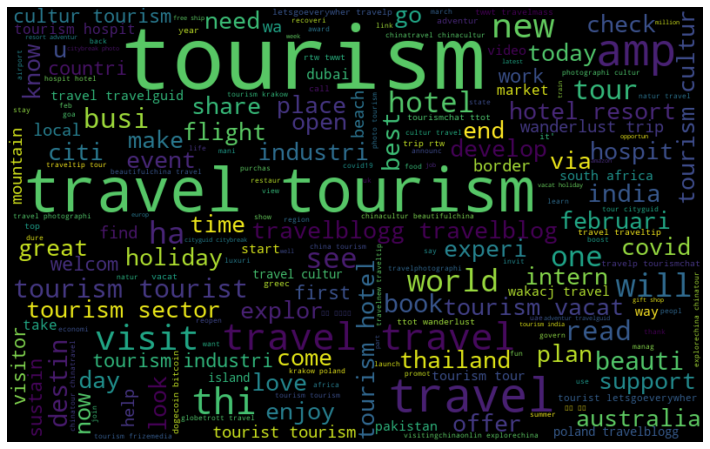

In [ ]:
#Exploratory data analysis 
all_words = " ".join([sentence for sentence in tweets_df['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
!pip install -U textblob

!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\biju\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\biju\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\biju\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\biju\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\biju\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\biju\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [ ]:
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity
tweets_df['Subjectivity'] = tweets_df['tweet'].apply(getSubjectivity)
tweets_df['Polarity'] = tweets_df['tweet'].apply(getPolarity)
tweets_df

,Unnamed: 0,user_name,user_location,user_description,user_verified,date,tweet,like,hashtags,source,is_retweet,Subjectivity,Polarity
0,0,Tour Nature Culture & Beauty,NaN,"Travelling, Culture, Nature, Beauty",False,2022-02-11 09:09:28+00:00,beauti view of centuri old market of nagarpark...,0,"['Nagarparkar', 'Tharparkar', 'Sindh', 'touris...",Twitter Web App,False,0.222222,0.066667
1,1,West Bengal Tourism,Kolkata,Official Twitter Account of Tourism Department...,True,2022-02-11 09:07:01+00:00,"the land of natur beauty, purulia welcom you b...",495,"['Purulia', 'Beauty', 'Bengal', 'BengalTourism...",Twitter Web App,False,0.000000,0.000000
2,2,Renfe-SNCF,NaN,We invite you to discover the new High Speed R...,False,2022-02-11 09:07:00+00:00,"🔝🚅 nextstop 🚅🔝 built in the 18th century, the ...",1626,"['NEXTSTOP', 'SantFerran', 'Catalonia', 'Spain...",Twitter Web App,False,0.000000,0.000000
3,3,VisitBritain Biz,London,VisitBritain is Britain's national tourism age...,False,2022-02-11 09:05:51+00:00,our chair dame judith macgregor (r) with 's 's...,3218,"['APMEA', 'UKPavillion', 'UKNationalDay', 'tou...",Twitter Web App,False,0.000000,0.000000
4,4,Carmel Tourism,"Ibadan, Nigeria",Explore Africa Tourism\nTour Guide 👣| Travel A...,False,2022-02-11 09:03:27+00:00,"it' friday guys, do well to follow our page _t...",102,"['carmeltourism', 'Tourism', 'ValentinesDay', ...",Twitter Web App,False,0.066667,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942,4942,CICA Secretariat,"Nur-Sultan, Kazakhstan",Secretariat of the Conference on Interaction a...,False,2022-02-04 03:45:08+00:00,sincer congratul to srilanka on the occas of t...,382,"['SriLanka', 'IndependenceDay', 'CICA', 'touri...",Twitter for Android,False,0.300000,1.000000
4943,4943,La Esperanza Travels,"Gurgaon, India","La Esperanza Travels, A Leading Travel Agent a...",False,2022-02-04 03:40:45+00:00,bali to reopen for intern tourist start februa...,1,"['Bali', 'Covid19', 'Indonesia', 'Internationa...",Twitter Web App,False,0.000000,0.000000
4944,4944,SCMP Economy,Hong Kong,News and analysis on the big economic stories ...,True,2022-02-04 03:30:05+00:00,china’ onc us$1.5 trillion tourism industri hi...,73,"['China', 'china', 'tourism', 'tourist', 'trav...",Buffer,False,0.541667,-0.291667
4945,4945,RiDetroit,"Detroit, MI",Detroit’s ONLY all eBike tour company. We offe...,False,2022-02-04 03:19:30+00:00,come spring 2022! ridetroit ebik tour tourism ...,15,"['ridetroit', 'ebike', 'tour', 'tourism', 'Bla...",Twitter for iPhone,False,0.000000,0.000000


In [ ]:
!pip install matplotlib

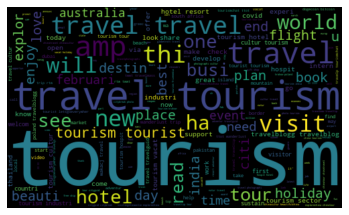

In [ ]:
# visualize the frequent words
#plot the word cloud
allWords = ' '.join( [tweet for tweet in tweets_df['tweet']] )
wordCloud = WordCloud(width = 500, height=300, random_state=21, max_font_size=119).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
#plt.imshow(wordCloud, interpolation="nearest")
plt.axis('off')
plt.show()

In [ ]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
tweets_df['Analysis'] = tweets_df['Polarity'].apply(getAnalysis)
tweets_df

,Unnamed: 0,user_name,user_location,user_description,user_verified,date,tweet,like,hashtags,source,is_retweet,Subjectivity,Polarity,Analysis
0,0,Tour Nature Culture & Beauty,NaN,"Travelling, Culture, Nature, Beauty",False,2022-02-11 09:09:28+00:00,beauti view of centuri old market of nagarpark...,0,"['Nagarparkar', 'Tharparkar', 'Sindh', 'touris...",Twitter Web App,False,0.222222,0.066667,Positive
1,1,West Bengal Tourism,Kolkata,Official Twitter Account of Tourism Department...,True,2022-02-11 09:07:01+00:00,"the land of natur beauty, purulia welcom you b...",495,"['Purulia', 'Beauty', 'Bengal', 'BengalTourism...",Twitter Web App,False,0.000000,0.000000,Neutral
2,2,Renfe-SNCF,NaN,We invite you to discover the new High Speed R...,False,2022-02-11 09:07:00+00:00,"🔝🚅 nextstop 🚅🔝 built in the 18th century, the ...",1626,"['NEXTSTOP', 'SantFerran', 'Catalonia', 'Spain...",Twitter Web App,False,0.000000,0.000000,Neutral
3,3,VisitBritain Biz,London,VisitBritain is Britain's national tourism age...,False,2022-02-11 09:05:51+00:00,our chair dame judith macgregor (r) with 's 's...,3218,"['APMEA', 'UKPavillion', 'UKNationalDay', 'tou...",Twitter Web App,False,0.000000,0.000000,Neutral
4,4,Carmel Tourism,"Ibadan, Nigeria",Explore Africa Tourism\nTour Guide 👣| Travel A...,False,2022-02-11 09:03:27+00:00,"it' friday guys, do well to follow our page _t...",102,"['carmeltourism', 'Tourism', 'ValentinesDay', ...",Twitter Web App,False,0.066667,0.033333,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942,4942,CICA Secretariat,"Nur-Sultan, Kazakhstan",Secretariat of the Conference on Interaction a...,False,2022-02-04 03:45:08+00:00,sincer congratul to srilanka on the occas of t...,382,"['SriLanka', 'IndependenceDay', 'CICA', 'touri...",Twitter for Android,False,0.300000,1.000000,Positive
4943,4943,La Esperanza Travels,"Gurgaon, India","La Esperanza Travels, A Leading Travel Agent a...",False,2022-02-04 03:40:45+00:00,bali to reopen for intern tourist start februa...,1,"['Bali', 'Covid19', 'Indonesia', 'Internationa...",Twitter Web App,False,0.000000,0.000000,Neutral
4944,4944,SCMP Economy,Hong Kong,News and analysis on the big economic stories ...,True,2022-02-04 03:30:05+00:00,china’ onc us$1.5 trillion tourism industri hi...,73,"['China', 'china', 'tourism', 'tourist', 'trav...",Buffer,False,0.541667,-0.291667,Negative
4945,4945,RiDetroit,"Detroit, MI",Detroit’s ONLY all eBike tour company. We offe...,False,2022-02-04 03:19:30+00:00,come spring 2022! ridetroit ebik tour tourism ...,15,"['ridetroit', 'ebike', 'tour', 'tourism', 'Bla...",Twitter for iPhone,False,0.000000,0.000000,Neutral


In [ ]:
j=1
sortedDF = tweets_df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+sortedDF['tweet'][i])
        print()
        j=j+1

1) beauti view of centuri old market of nagarparkar last town of tharparkar sindh locat near on pakistani border with india tourism backpack

2) it' friday guys, do well to follow our page _tour on social media. facebook: instagram: thank you, have a bless weekend. carmeltour tourism valentinesday vacat vacat vacationtim

3) busi new are you an entrepreneur? do you think that euro will support the busi like commun in europe? it is go to be easier to buy for the tourist so in everi countri the tourism industri will be more profit to begin with, it will be guaranteed.

4) babi bali: are top bsc whale expect thi tourism-rel token to take off? babybali blockchain pariwisata tourism crypto asset cryptotoday catatankripto dailydosecrypto

5) cfp: "nature-bas tourism and wellbeing: impact and futur outlook" to be publish by cabi for more info: deadlin for abstract submission: 28 februari protectedarea overtour wellnesstour natureconnect sustainabledevelop

6) 🚗 up &amp; down shader 🚕 an elega

In [ ]:
j=1
sortedDF = tweets_df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+sortedDF['tweet'][i])
        print()
        j=j+1

1) plea boycott itali a fascist country, go elsewher for your holiday vaccinemand for restaurant, cinema, theater even to work and for public transport no more grant humanright for unvaccin peopl tourism travel fascism

2) walk down an era of india' cultur and artist histori while you stay at chokhi dhani. rajasthan tourism travel wander culturalheritag cultur india artwork artistontwitt resort fridayfeel fridaymotiv fridaymorn fridayvib weekend

3) souvenir i blame the railway for allow the work man to escap the drudgeri of everyday existence. they had to buy some form of pilgrim token railway = clutter porcelain tourism ceram cultur

4) j&amp;k ha emerg a a leader in the tourism sector over the last two and a half years. thi step will empow local communities, youth &amp; woman &amp; will help in build tourist infra of world standard in rural j&amp;k, boost tourism!! shiningjammukashmir badaltakashmir

5) beij hotel see olymp rate surg while other chine citi sputter travel hotel resor

In [ ]:
j=1
sortedDF = tweets_df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Neutral'):
        print(str(j) + ') '+sortedDF['tweet'][i])
        print()
        j=j+1

1) the land of natur beauty, purulia welcom you back. explor and experi the beauti of bengal purulia beauti bengal bengaltour explor westbengaltour tourism travel experiencebeng departmentoftourismwestbeng bengalwelcomesyouback

2) 🔝🚅 nextstop 🚅🔝 built in the 18th century, the castl of santferran is the largest militari fortress in catalonia. discov some interest fact about it in thi article. 🏰😍 spain travel tourism trip curio figuer

3) our chair dame judith macgregor (r) with 's 's head stephen mcgowan and our apmea director at the stun ukpavillion for uknationalday yday - put our tourism offer in the spotlight, boost visit to britain.

4) hotel ride out asia' disjoint border reopen travel hotel resort travelnew traveltip trip traveld trip tourism vacat expedit citybreak photographi

5) fli to madeira island? check thi out: madeiraisland tourism travel turismo portug funchal

6) icymi – for tourism busi in sussex, thi webinar ha lot of use info on how to access grant fund and busi su

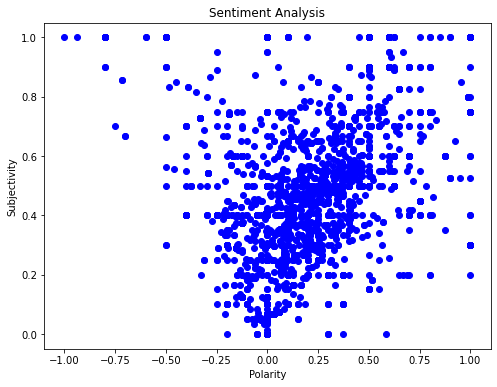

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, tweets_df.shape[0]):
    plt.scatter(tweets_df['Polarity'][i], tweets_df['Subjectivity'][i], color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#get the percentage of positive tweets
ptweets = tweets_df[tweets_df.Analysis == 'Positive']
ptweets = ptweets['tweet']
round(  (ptweets.shape[0] / tweets_df.shape[0]) *100 , 1)

43.5

In [ ]:
#get the percentage of negative tweets
ntweets = tweets_df[tweets_df.Analysis == 'Negative']
ntweets = ntweets['tweet']
round(  (ntweets.shape[0] / tweets_df.shape[0]) *100 , 1)

9.4

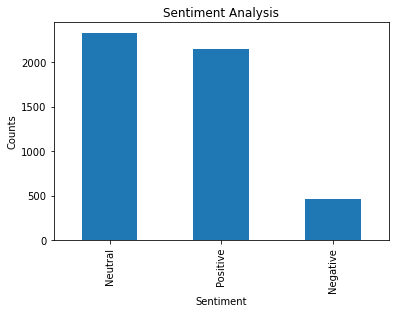

In [ ]:
#the value counts
tweets_df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets_df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(tweets_df['tweet'])

In [ ]:
#bow[0].toarray()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, tweets_df['tweet'], random_state=0, test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

In [ ]:
#training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#testing
pred = model.predict(x_test)
f1_score(y_test, pred, pos_label='Positive', average='micro')

0.1471301535974131

In [ ]:
accuracy_score(y_test, pred)

0.1471301535974131

In [ ]:
#  use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >=0.3
pred = pred.astype(np.int)
pred = pred.astype(np.str)

f1_score(y_test, pred, average='micro')

0.0

In [ ]:
pred_prob[0][1] >= 0.3

False

In [ ]:
def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

In [ ]:
tweets_df.shape

(4947, 14)

In [ ]:
tweets_df.columns

Index(['Unnamed: 0', 'user_name', 'user_location', 'user_description',
       'user_verified', 'date', 'tweet', 'like', 'hashtags', 'source',
       'is_retweet', 'Subjectivity', 'Polarity', 'Analysis'],
      dtype='object')

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=1)
y = tweets_df.Polarity
tweet_features = ['like', 'Subjectivity', 'Polarity']
x = tweets_df[tweet_features]
X.describe()
model.fit(x, y)
print("The predictions are")
print(model.predict(x.head()))
#pred = model.predict(x_test)
#f1_score(y_test, pred)

The predictions are
[0.06666667 0.         0.         0.         0.03333333]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( tweets_df['tweet'], tweets_df['Polarity'], random_state=42)
print(x_train, y_train)

3862    dive industri market studies, guid &amp; refer...
1068    wayfind just got fun with worldcast! webar uni...
3226    siesta key beach, florida siestakey sarasota f...
4762    a great walk to a great pub: the fauconberg, n...
4196    read about this: salzburg - travel and tourism...
                              ...                        
4426    visit latestaviationstoriesinghana aviationgha...
466     _brand thank you veri much _brand for sharing....
3092    bordeaux &amp; valencia receiv the 2022 eutour...
3772    sundaymorn sundrop sundayfunday sunday sundaym...
860     thi research offer potenti solut for the probl...
Name: tweet, Length: 3710, dtype: object 3862    0.000
1068    0.375
3226    0.000
4762    0.800
4196    0.000
        ...  
4426    0.000
466     0.100
3092    0.500
3772    0.275
860     0.000
Name: Polarity, Length: 3710, dtype: float64


In [ ]:
x_train

3862    dive industri market studies, guid &amp; refer...
1068    wayfind just got fun with worldcast! webar uni...
3226    siesta key beach, florida siestakey sarasota f...
4762    a great walk to a great pub: the fauconberg, n...
4196    read about this: salzburg - travel and tourism...
                              ...                        
4426    visit latestaviationstoriesinghana aviationgha...
466     _brand thank you veri much _brand for sharing....
3092    bordeaux &amp; valencia receiv the 2022 eutour...
3772    sundaymorn sundrop sundayfunday sunday sundaym...
860     thi research offer potenti solut for the probl...
Name: tweet, Length: 3710, dtype: object

In [ ]:
def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

In [ ]:

#from sklearn.feature_extraction.text import TfidfVectorizer
#vect = TfidfVectorizer().fit(x_train)

In [ ]:
len(vect.get_feature_names())

12551

In [ ]:
x_train_vectorized = vect.transform(x_train)

In [ ]:
from sklearn  import metrics, svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
model = LogisticRegression()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, tweets_df['tweet'], random_state=0, test_size=0.25)
#lab_enc = preprocessing.LabelEncoder()
#training_scores_encoded = lab_enc.fit_transform(y_train)
#print(training_scores_encoded)
#print(utils.multiclass.type_of_target(y_train))
#print(utils.multiclass.type_of_target(y_train.astype('int')))
#print(utils.multiclass.type_of_target(training_scores_encoded))

#model.fit(x_train_vectorized, y_train)

In [ ]:
model = LinearRegression()
#/model.fit(x_train, y_train)
#model.fit(x_train, training_scores_encoded)
#print("LogisticRegression")
#pred = model.predict(vect.transform(x_test))
model.fit(x, y)

LinearRegression()

In [ ]:
#pred = model.predict(vect.transform(x_test))
pred = model.predict(x_test)

ValueError: dimension mismatch